loading NeshData/keeper.npz
5002


<IPython.core.display.Javascript object>


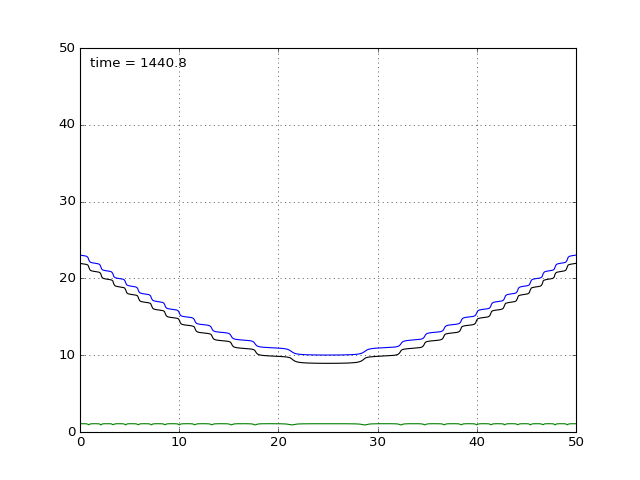

In [25]:
# This is for animation 
# see https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

npzfile = 'NeshData/keeper.npz'
mp4file = 'NeshData keepers/continuum_model6 9-3-2016[5] movie.mp4'

print "loading", npzfile
npzfile = np.load(npzfile)
Fliq = npzfile['Fliq']
Nice = npzfile['Nice']
x = npzfile['x']
t = npzfile['t']
nframes = len(t); print len(t)
nframes = 1000

minpoint = min(Nice[0])
fig = plt.figure(1)
#ax = plt.axes(xlim=(0, max(x)), ylim=(0,max(Nice[-1])))
ax = plt.axes(xlim=(0, max(x)), ylim=(0,50))
ax.grid('on')
line1, = ax.plot([],[], 'k', )
line2, = ax.plot([],[], 'b')
line3, = ax.plot([],[], 'g')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    time_text.set_text('')
    return line1, line2, line3, time_text

# animation function.  This is called sequentially
def animate(i):
    line1.set_data(x, Nice[i]-minpoint)
    line2.set_data(x, Fliq[i]+Nice[i]-minpoint)
    line3.set_data(x, Fliq[i])
    time_text.set_text('time = %.1f' % t[i])
    return line1, line2, line3, time_text

# Create animation
anim = animation.FuncAnimation(\
        fig, animate, frames=nframes, interval=2, repeat_delay=1000, blit=True)


# Show it
# plt.show()


In [26]:
# Save it
anim.save(mp4file, fps=30, codec='mpeg4')